<a href="https://colab.research.google.com/github/Ziedny28/PCVK-Ganjil-2023/blob/main/week-06/Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob


In [47]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
lena = cv.imread('/content/drive/MyDrive/Colab Notebooks/Kampus-PCVK/Datas/Images/lena.jpg')

## Nomor 3: Buatlah histogram citra seperti output histogram berikut berdasarkan flowchart di bawah ini : (Gunakan gambar lena.jpg)


In [49]:
def generate_rgb_histograms(image,suptitle='Histogram RGB Plot'):

  # Menghitung tinggi, lebar, dan kedalaman citra.
  height, width, depth = np.shape(image)

  # Membuat array untuk menyimpan histogram red, green, dan blue.
  blue = [0] * 256
  green = [0] * 256
  red = [0] * 256

  # Menghitung histogram red, green, dan blue.
  for y in range(0, height):
    for x in range(0, width):
      blue[image[y][x][0]] += 1
      green[image[y][x][1]] += 1
      red[image[y][x][2]] += 1

  # Membuat array untuk menyimpan nama-nama bin.
  names = np.arange(256)

  # Membuat plot histogram RGB.
  fig, axs = plt.subplots(1, 3, figsize=[20, 5], sharex=True, sharey=True)
  fig.suptitle(suptitle)
  fig.text(0.05, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
  fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')

  axs[0].bar(names, red, color='red')
  axs[1].bar(names, green, color='green')
  axs[2].bar(names, blue, color='blue')

  # Menampilkan plot histogram RGB.
  plt.show()

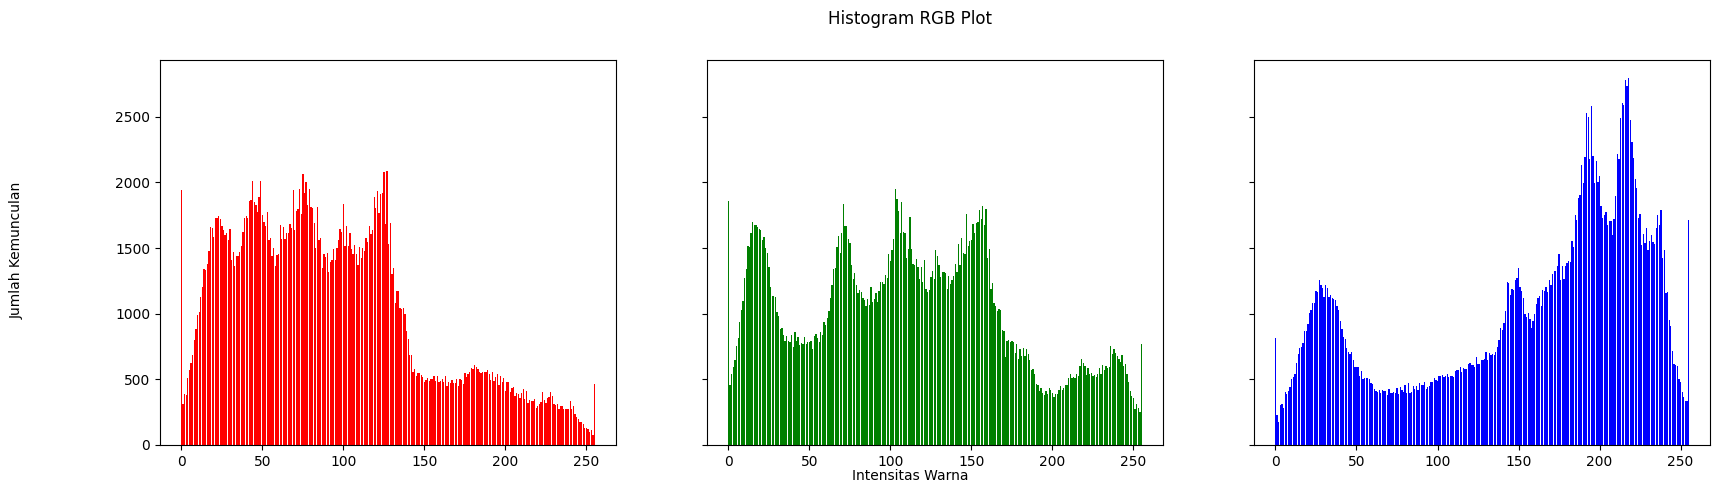

In [50]:
generate_rgb_histograms( cv.cvtColor(lena,cv.COLOR_BGR2RGB))

## Nomor 4: Setelah mengerjakan soal no. 3, buatlah histogram citra yang sama akan tetapi menggunakan library yang dimiliki oleh NumPy yaitu “histogram”. Bandingkan hasilnya. Apakah output muncul sama?

Untuk hasilnya sama, namun tidak perlu mengubah dari bgr ke rgb

In [51]:
def generate_histograms(image):

  # Menghitung histogram red.
  histogram_red = cv.calcHist([image], [0], None, [256], [0, 255])

  # Menghitung histogram green.
  histogram_green = cv.calcHist([image], [1], None, [256], [0, 255])

  # Menghitung histogram blue.
  histogram_blue = cv.calcHist([image], [2], None, [256], [0, 255])

  # Menampilkan histogram red.
  plt.plot(histogram_red)
  plt.xlabel("Nilai pixel red")
  plt.ylabel("Jumlah kemunculan")
  plt.show()

  # Menampilkan histogram green.
  plt.plot(histogram_green)
  plt.xlabel("Nilai pixel green")
  plt.ylabel("Jumlah kemunculan")
  plt.show()

  # Menampilkan histogram blue.
  plt.plot(histogram_blue)
  plt.xlabel("Nilai pixel blue")
  plt.ylabel("Jumlah kemunculan")
  plt.show()



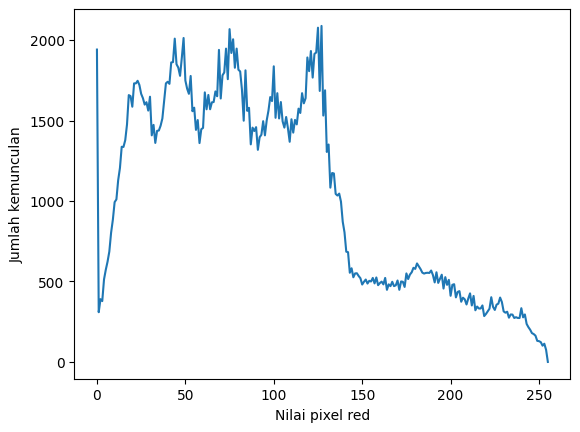

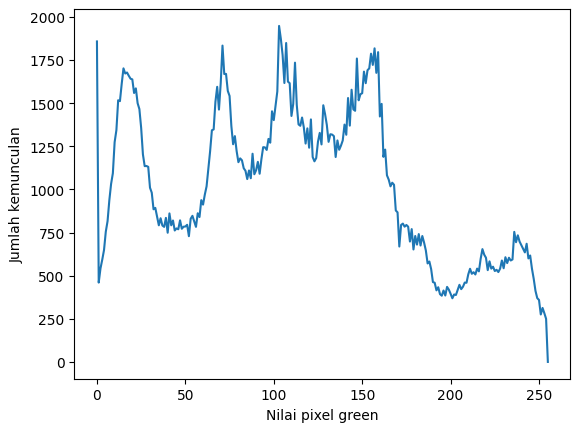

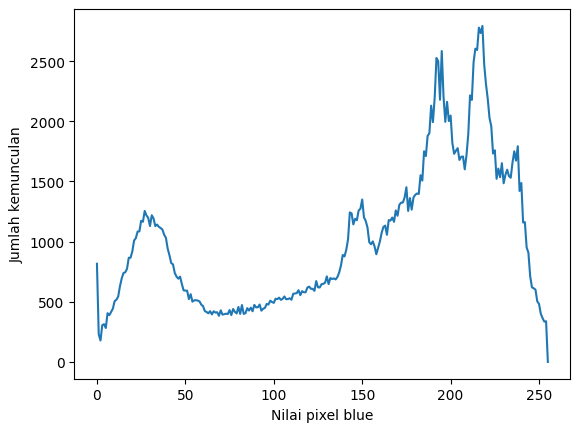

In [52]:
image = lena
generate_histograms(image)

## Nomor 5: Buatlah histogram citra seperti output histogram equalization dan juga tampilangambar sebelum dan sesudah proses histogram equalization berikut berdasarkan flowchart di bawah ini : (Gunakan gambar lena_lc.jpg)

In [53]:
lena_lc = cv.imread('/content/drive/MyDrive/Colab Notebooks/Kampus-PCVK/Datas/Images/lena_lc.jpg')

In [54]:
def histogram_equalization(image):


  # Konversi citra RGB ke array Numpy.
  image_array = np.asarray(image)

  # Menghitung histogram ternormalisasi akumulatif.
  histogram_array = np.bincount(image_array.flatten(), minlength=256)
  histogram_array = histogram_array / np.sum(histogram_array)
  chistogram_array = np.cumsum(histogram_array)

  # Membuat tabel pencarian transformasi.
  transform_map = np.floor(255 * chistogram_array).astype(np.uint8)

  # Melakukan transformasi.
  eq_img_array = np.reshape(np.asarray([transform_map[p] for p in image_array.flatten()]), image_array.shape)

  # Konversi array Numpy kembali ke citra RGB.
  equalized_image = eq_img_array.astype(np.uint8)

  return equalized_image

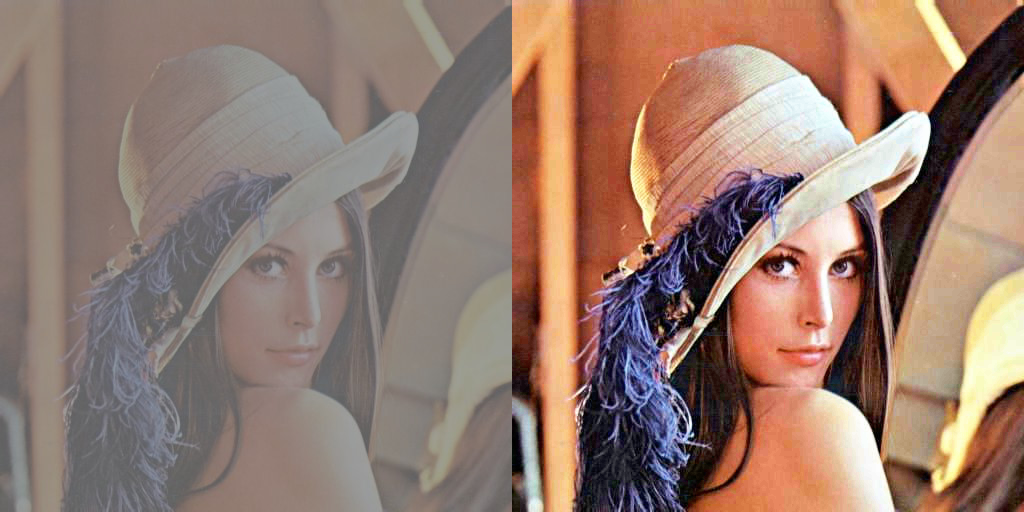

In [55]:
equalized_image = histogram_equalization(lena_lc)

final_frame = cv.hconcat((lena_lc, equalized_image))

cv2_imshow(final_frame)

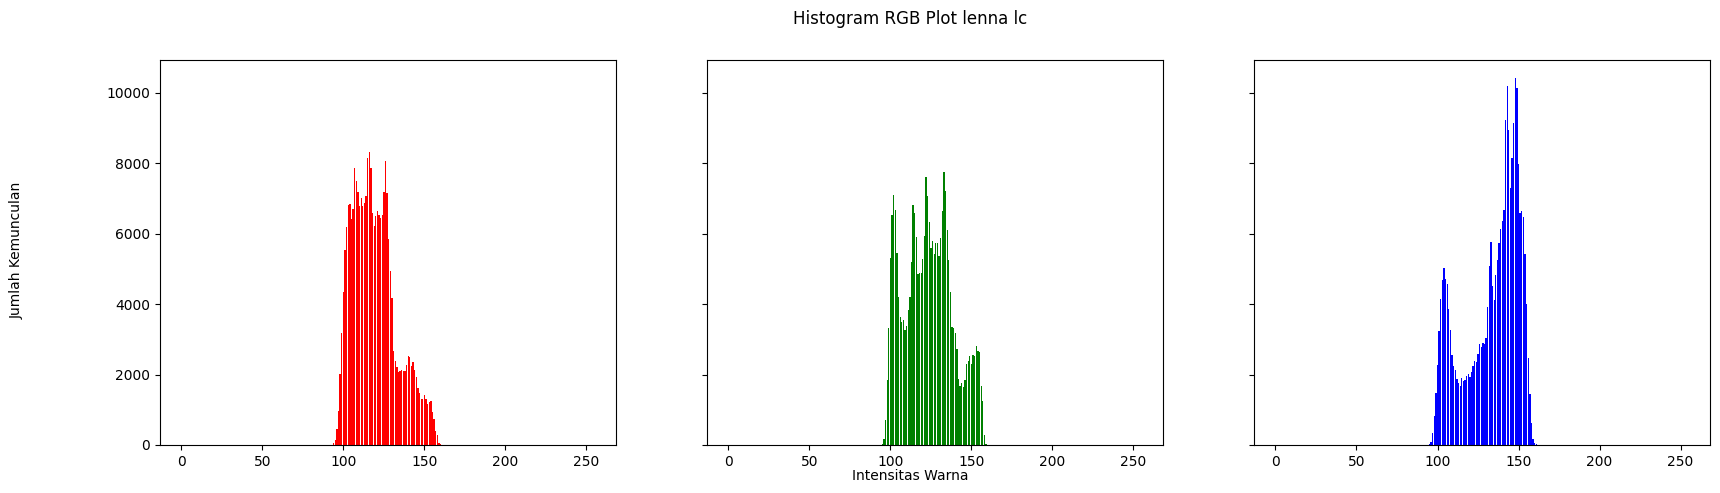

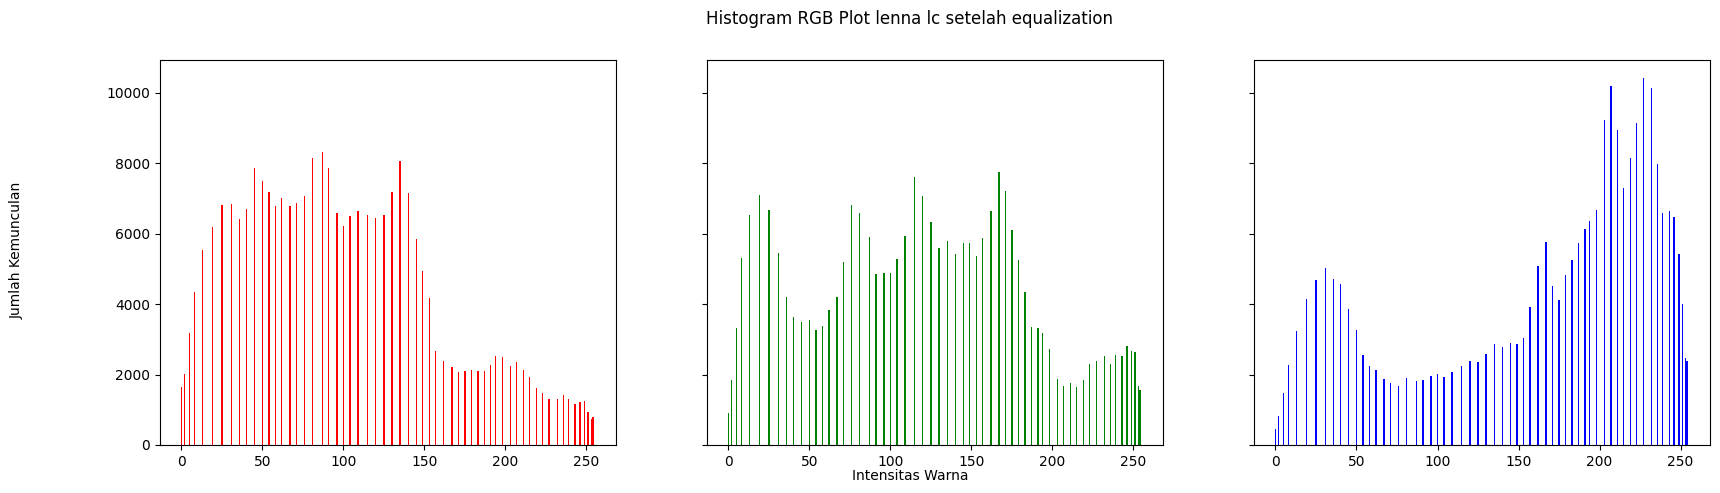

In [56]:
generate_rgb_histograms( cv.cvtColor(lena_lc,cv.COLOR_BGR2RGB),'Histogram RGB Plot lenna lc')
generate_rgb_histograms( cv.cvtColor(equalized_image,cv.COLOR_BGR2RGB), 'Histogram RGB Plot lenna lc setelah equalization')

## Nomor 6: Setelah mengerjakan soal no. 5, buatlah histogram citra yang sama akan tetapi menggunakan library yang dimiliki oleh CV2 yaitu “equalizeHist”. Bandingkan hasilnya. Apakah output muncul sama?

In [57]:
def histog(img):
    height, width, depth = np.shape(img)
    ax = np.zeros((3, 256))
    for y in range(0, height):
        for x in range(0, width):
            ax[0][img[y][x][0]] += 1
            ax[1][img[y][x][1]] += 1
            ax[2][img[y][x][2]] += 1
    return ax

def histogram_equalization_cv2(img):
  histo_asli = histog(img)

  equalized_channels = [cv.equalizeHist(img[:, :, i]) for i in range(3)]

  img2 = cv.merge(equalized_channels)

  return img2

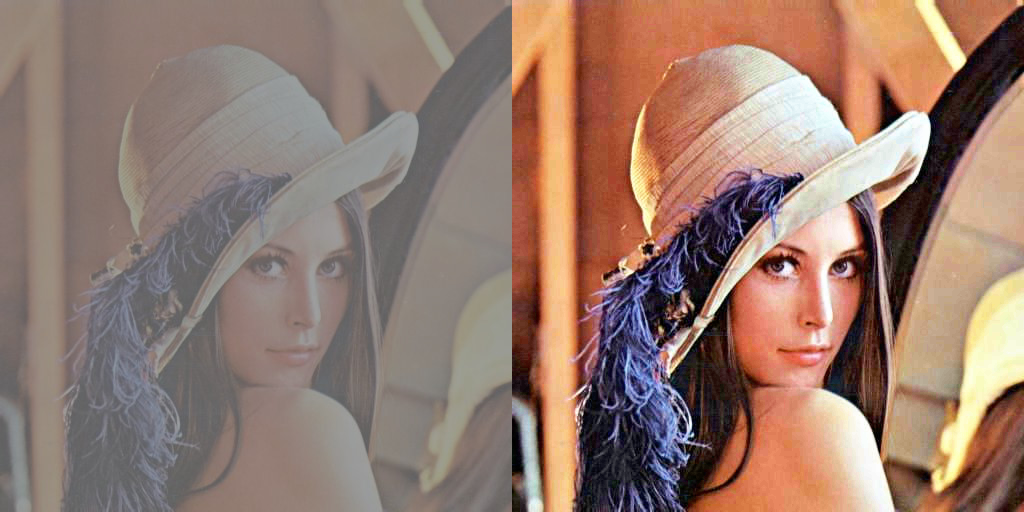

In [58]:

final_frame = cv.hconcat((lena_lc, equalized_image))

cv2_imshow(final_frame)

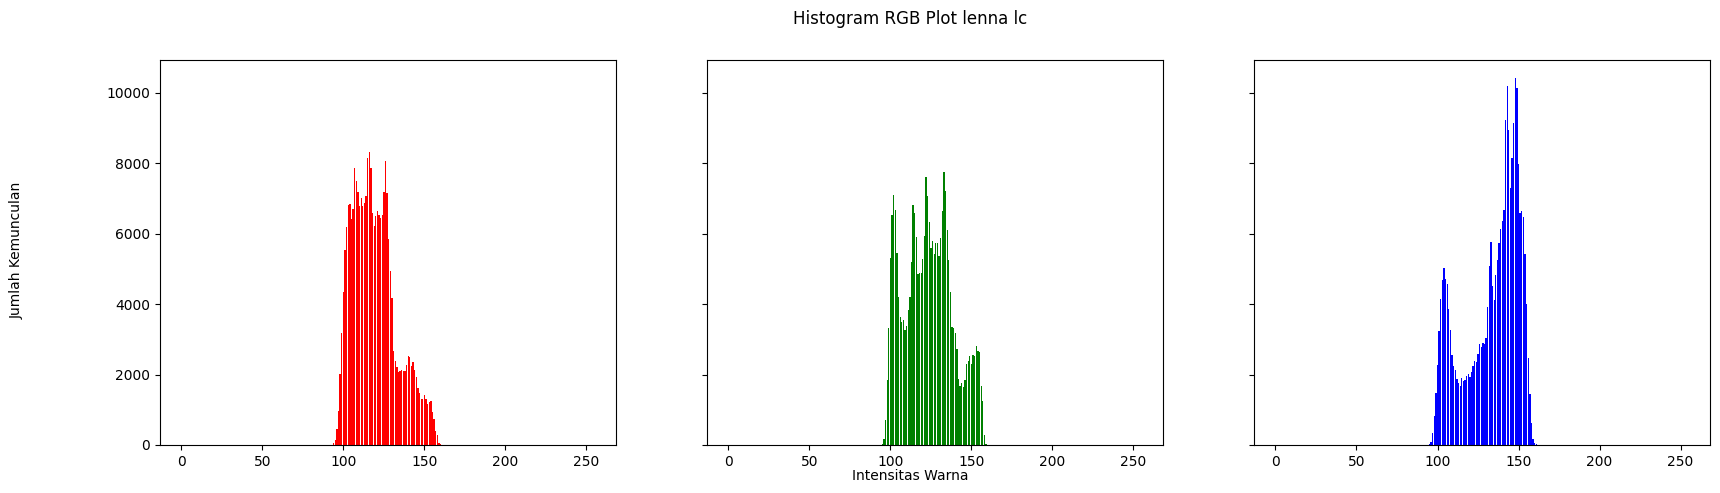

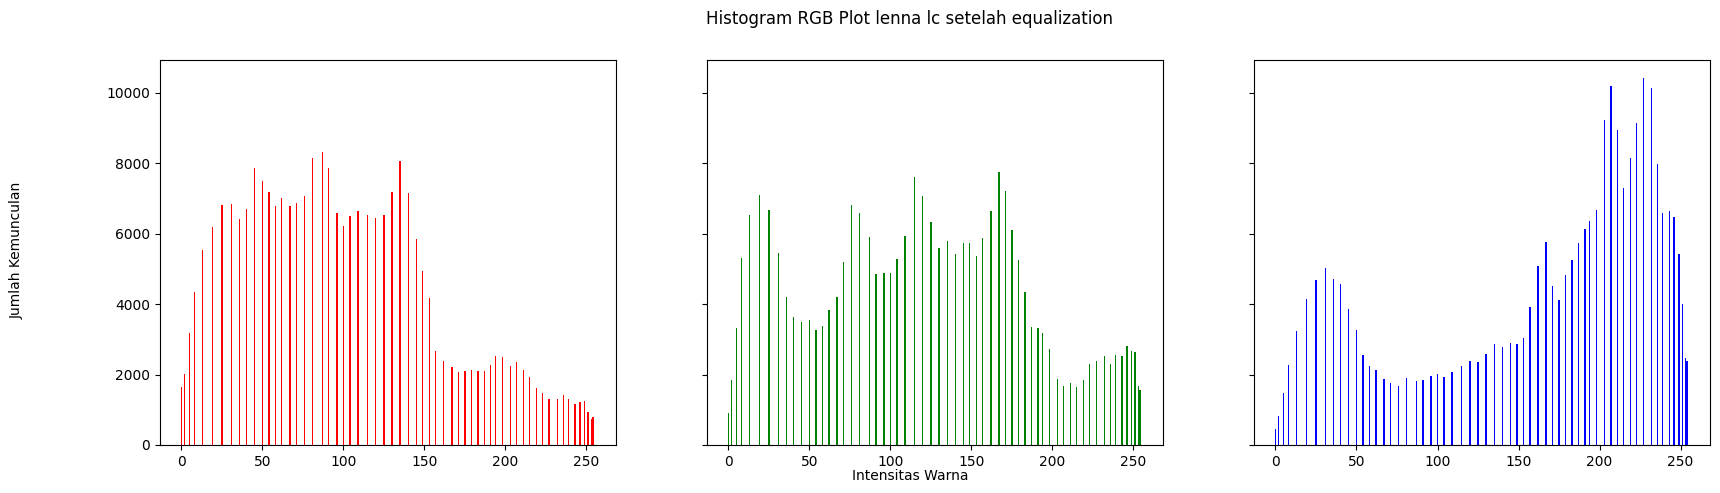

In [59]:
generate_rgb_histograms( cv.cvtColor(lena_lc,cv.COLOR_BGR2RGB),'Histogram RGB Plot lenna lc')
generate_rgb_histograms( cv.cvtColor(equalized_image,cv.COLOR_BGR2RGB), 'Histogram RGB Plot lenna lc setelah equalization')

## Nomor 7: Lakukanlah proses pemetaan 16 juta warna RGB ke dalam 8 warna saja, yaitu hitam,hijau, kuning, biru, cyan, magenta, putih seperti output berikut berdasarkan flowchart di bawah ini! (Gunakan gambar lena.jpg)

In [60]:
def warnaTerdekat (r, g, b):
  pValue = 0
  minDistance = 255*255 + 255*255 + 255*255 + 1
  warnaPallette = [[0, 0, 0], [255, 0, 0], [0, 255, 0], [255, 255, 0], [0, 0, 255], [255, 0, 255], [0, 255, 255], [255, 255, 255]]
  for i in range(len(warnaPallette)):
    rDiff = r - warnaPallette[i][0]
    gDiff = g - warnaPallette[i][1]
    bDiff = b - warnaPallette[i][2]
    distance = rDiff*rDiff + gDiff*gDiff + bDiff*bDiff
    if (distance < minDistance):
      minDistance = distance
      pValue = i
  return pValue

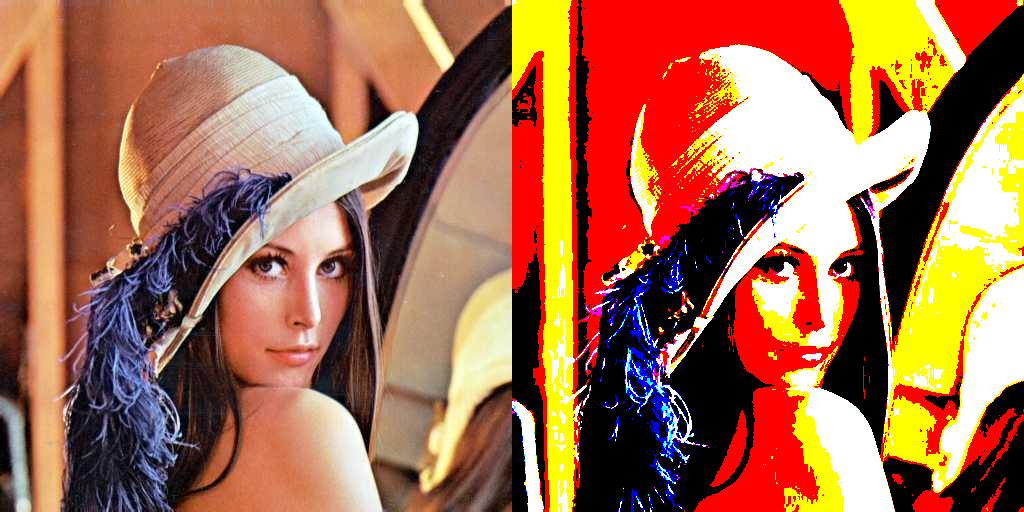

In [61]:
warnaPallette = [[0, 0, 0], [255, 0, 0], [0, 255, 0], [255, 255, 0], [0, 0, 255], [255, 0, 255], [0, 255, 255], [255, 255, 255]]
lena_rgb = cv.cvtColor(lena, cv.COLOR_BGR2RGB)
lena_rgb_zeros = np.zeros(lena_rgb.shape, lena_rgb.dtype)

for y in range(0, lena_rgb.shape[0]):
  for x in range(0, lena_rgb.shape[1]):
    baru = warnaTerdekat(lena_rgb[y, x, 0], lena_rgb[y, x, 1], lena_rgb[y, x, 2])
    lena_rgb_zeros[y, x] = warnaPallette[baru]

lena_rgb = cv.cvtColor(lena_rgb, cv.COLOR_BGR2RGB)
lena_rgb_zeros = cv.cvtColor(lena_rgb_zeros, cv.COLOR_BGR2RGB)

final_frame = cv.hconcat((lena_rgb, lena_rgb_zeros))
cv2_imshow(final_frame)

## Nomor 8:Lakukanlah proses dithering Floyd and Steinberg seperti output berikut (tampilan imageawal, dan tampilan setelah dithering) berdasarkan flowchart di bagian bawah halaman modul ini! (Gunakan gambar lena.jpg)

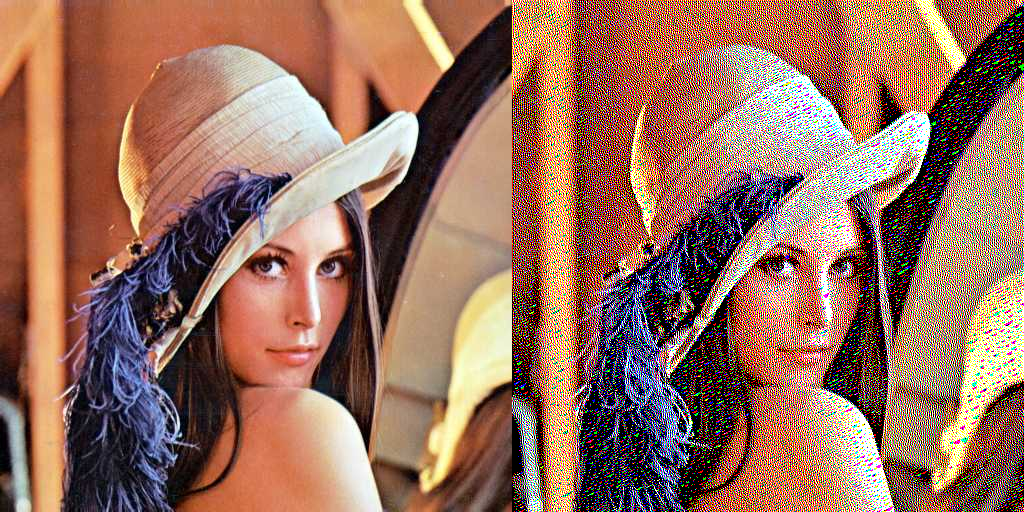

In [62]:
height, width, _ = lena.shape

def dithering_floyd_steinberg(img):
    output_img = np.copy(img)
    for y in range(height):
        for x in range(width):
            for channel in range(3):
                old_pixel = output_img[y, x, channel]
                new_pixel = 255 if old_pixel > 128 else 0
                output_img[y, x, channel] = new_pixel
                error = old_pixel - new_pixel

                if x < width - 1:
                    output_img[y, x + 1, channel] += error * 7 / 16
                if y < height - 1:
                    output_img[y + 1, x - 1, channel] += error * 5 / 16
                    output_img[y + 1, x, channel] += error * 3 / 16
                    if x < width - 1:
                        output_img[y + 1, x + 1, channel] += error * 1 / 16
    return output_img

dithered_img = dithering_floyd_steinberg(lena)

imgori = cv.cvtColor(lena, cv.COLOR_RGBA2RGB)
imgresult = cv.cvtColor(dithered_img, cv.COLOR_RGBA2RGB)
final_frame = cv.hconcat((imgori, imgresult))
cv2_imshow(final_frame)

## Nomor 9:

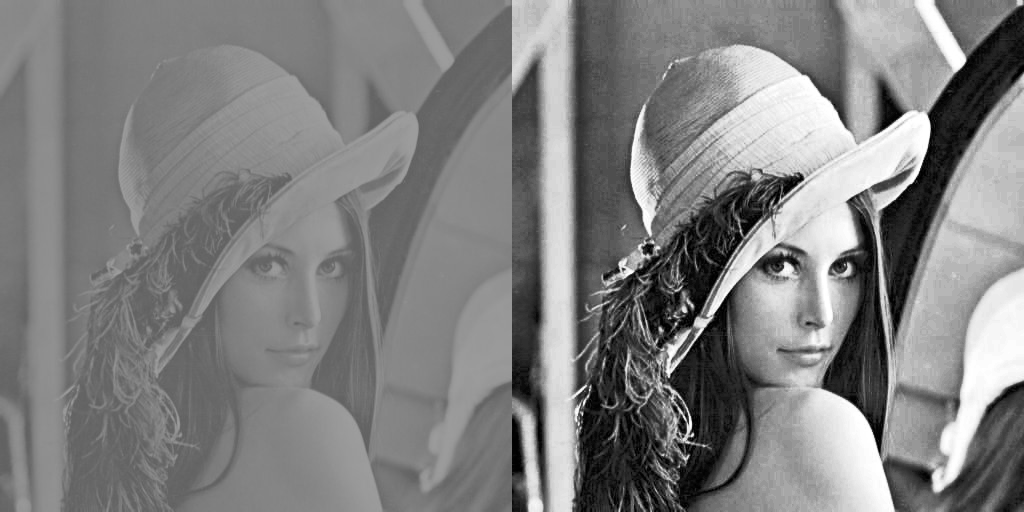

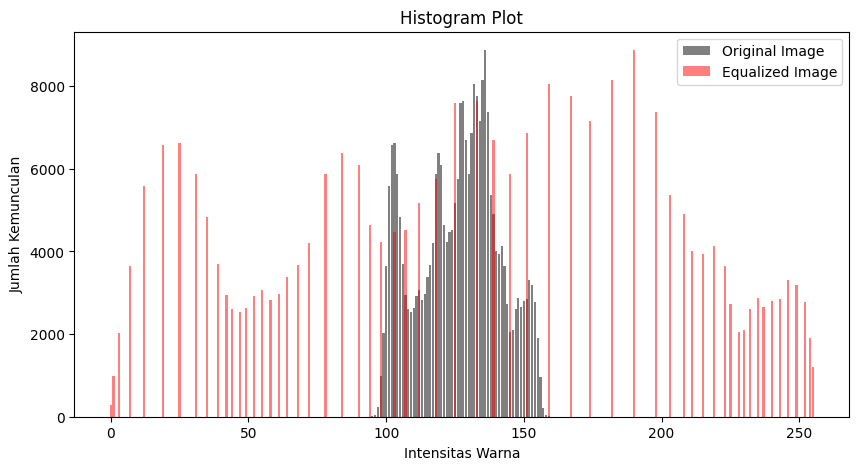

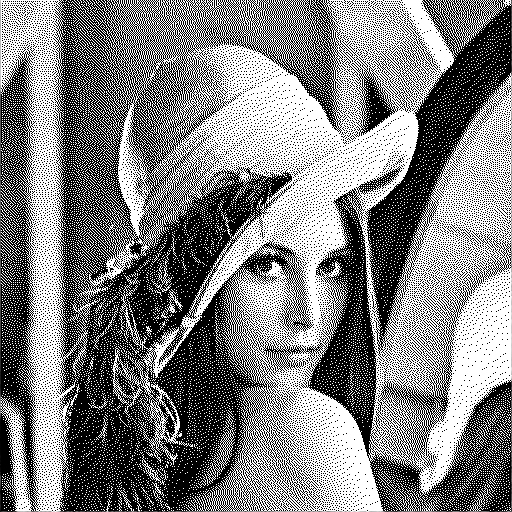

In [63]:

# Membuka citra dan mengkonversi ke grayscale
lena_gray = cv.cvtColor(lena_lc, cv.COLOR_BGR2GRAY)
lena_ori = cv.cvtColor(lena_lc, cv.COLOR_BGR2RGB)

# Melakukan equalization pada gambar grayscale
img_equalized = cv.equalizeHist(lena_gray)

# MENAMPILKAN GAMBAR
concatenated_img = cv.hconcat([lena_gray, img_equalized])
cv2_imshow(concatenated_img)

# Implementasikan proses dithering Floyd-Steinberg
height, width = img_equalized.shape[0], img_equalized.shape[1]
dithered_image = np.copy(img_equalized)

def threshold(value):
    if value > 255:
        return 255
    elif value < 0:
        return 0
    else:
        return value

def floyd_steinberg_dithering(img):
    height, width = img.shape
    for y in range(height - 1): # Karena kita membutuhkan tetangga y+1
        for x in range(1, width - 1): # Karena kita membutuhkan tetangga x-1 dan x+1
            old_pixel = img[y, x]
            new_pixel = 255 if old_pixel > 127 else 0
            img[y, x] = new_pixel
            error = old_pixel - new_pixel
            img[y, x + 1] = threshold(img[y, x + 1] + error * 7/16)
            img[y + 1, x - 1] = threshold(img[y + 1, x - 1] + error * 3/16)
            img[y + 1, x] = threshold(img[y + 1, x] + error * 5/16)
            img[y + 1, x + 1] = threshold(img[y + 1, x + 1] + error * 1/16)
    return img

dithered_img = floyd_steinberg_dithering(img_equalized.copy())

# Menghitung histogram untuk citra asli dan hasil equalisasi
hist_np, bins_np = np.histogram(lena_gray.flatten(), bins=256, range=[0, 256])
hist_eq, bins_eq = np.histogram(img_equalized.flatten(), bins=256, range=[0, 256])

names = np.arange(256)
plt.figure(figsize=(10,5))
plt.title('Histogram Plot')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Kemunculan')
plt.bar(names, hist_np, color='gray', label='Original Image')
plt.bar(names, hist_eq, color='red', alpha=0.5, label='Equalized Image')
plt.legend()
plt.show()

cv2_imshow(dithered_img)

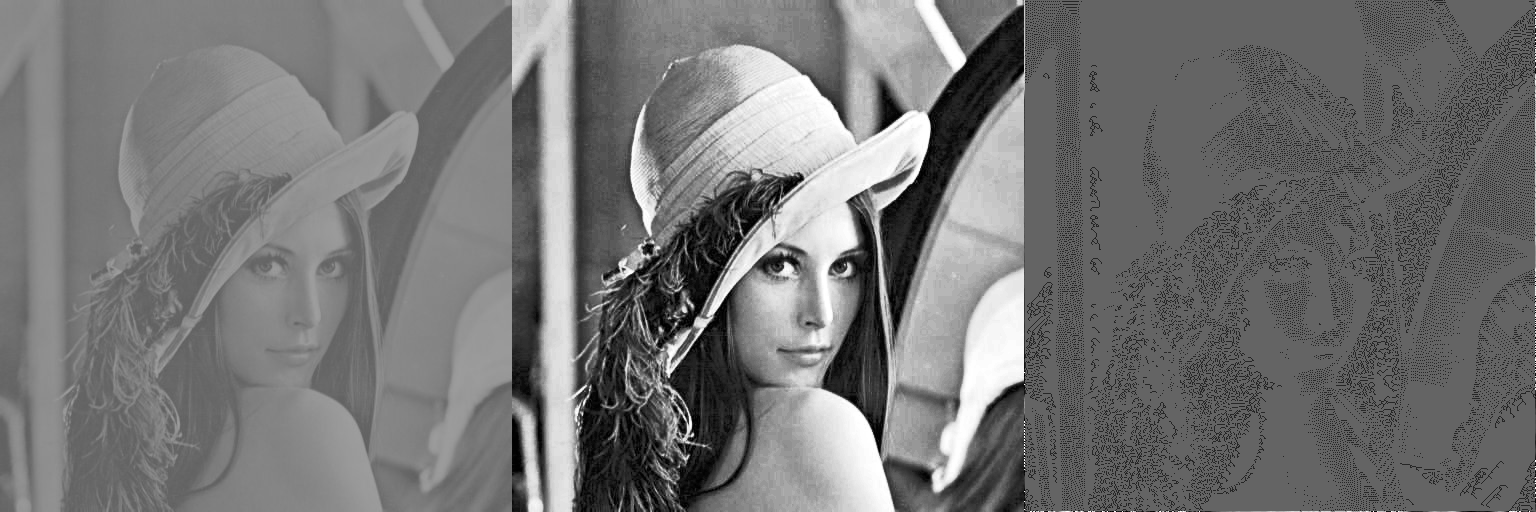

In [64]:
image = cv.cvtColor(lena_lc, cv.COLOR_BGR2GRAY)

# Histogram Equalization
equalized = cv.equalizeHist(image)

# proses dithering Floyd-Steinberg
height, width = equalized.shape[0], equalized.shape[1]
dithered = np.copy(equalized)

# Implementasikan proses dithering Floyd-Steinberg
height, width = equalized.shape[0], equalized.shape[1]
dithered = np.copy(equalized)

threshold = 230

for y in range(height - 1):
    for x in range(1, width - 1):
        old_pixel = dithered[y, x]
        new_pixel = 550 if old_pixel >= threshold else 100
        dithered[y, x] = new_pixel
        quantization_error = old_pixel - new_pixel
        dithered[y, x + 1] += quantization_error * 1 / 16
        dithered[y + 1, x - 1] += quantization_error * 1 / 16
        dithered[y + 1, x] += quantization_error * 3 / 16
        dithered[y + 1, x + 1] += quantization_error * 3 / 16

# Hitung histogram untuk citra grayscale asli dan citra hasil equalization
histo_asli = cv.calcHist([image], [0], None, [256], [0, 256])
histo_equalized = cv.calcHist([equalized], [0], None, [256], [0, 256])

# Menampilkan Citra
combined_images = np.hstack((image, equalized, dithered))
cv2_imshow(combined_images)